# Imports

In [4]:
#Wont work in Jupyterlite
%pip install ISLP

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolu

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [10]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [11]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

# Data loading


In [3]:
Boston = load_data('Boston')
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [ ]:
Boston

# Simple Regression

In [12]:
#creating the predictor matrix manually
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),'lstat':Boston['lstat']})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [14]:
Y = Boston['medv']
model = sm.OLS(Y, X)
results = model.fit()

In [16]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [21]:
#libraries like sklearn and ISLP allow the creation of transform objects created with some parameters as arguments that allow a
#more straighforward cration of the model matrix, especially when multiple varibales are included
#this time we use ModelSpec() hede imported as MS() from ISLP

In [22]:
design = MS(['lstat'])
design = design.fit(Boston) #fit may do some initial computations like means or std for centering and scaling
X = design.transform(Boston) #transform  applies the transofrmation to the array of data
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [23]:
#it can be done together with fit_transform()
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [24]:
results.summary() #more exaustive output

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           5.08e-88
Time:                        13:47:43   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
results.params #retrive coefficients

intercept    34.553841
lstat        -0.950049
dtype: float64

# Predictions and Intervals

In [26]:
#first we create a df with the variables used for the prediction
new_df = pd.DataFrame({'lstat':[5,10,15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [27]:
#then we can compute the predictions
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [28]:
#we can also produce confidence intervals
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [29]:
#and prediction intervals
new_predictions.conf_int(obs=True, alpha = 0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

# Plotting

In [35]:
#we can define a function line that we can add to a plot (ISLP includes a function for this)
def abline(ax, b, m,  *args, **kwargs):
  'Add a line with slope m and intercept b to an axis plot ax'
  xlim = ax.get_xlim()
  ylim = [m * xlim[0] + b,m * xlim[1] + b]
  ax.plot(xlim,ylim , *args, **kwargs) #args and kwargs allow any number of named or unnamed arguments to be added to the ax.plot

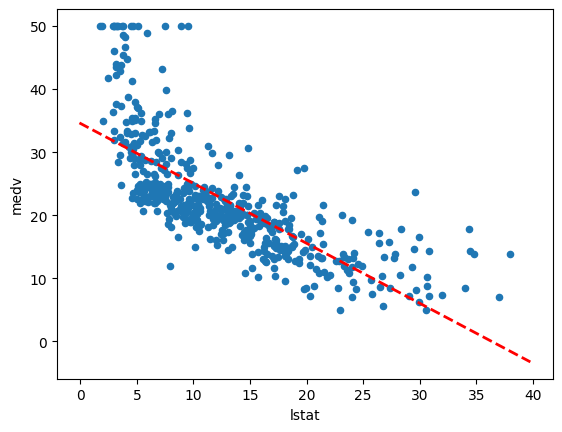

In [37]:
ax = Boston.plot.scatter('lstat','medv')
abline(ax,results.params[0],results.params[1], 'r--', linewidth = 2)

In [38]:
#some diagnostic plots next

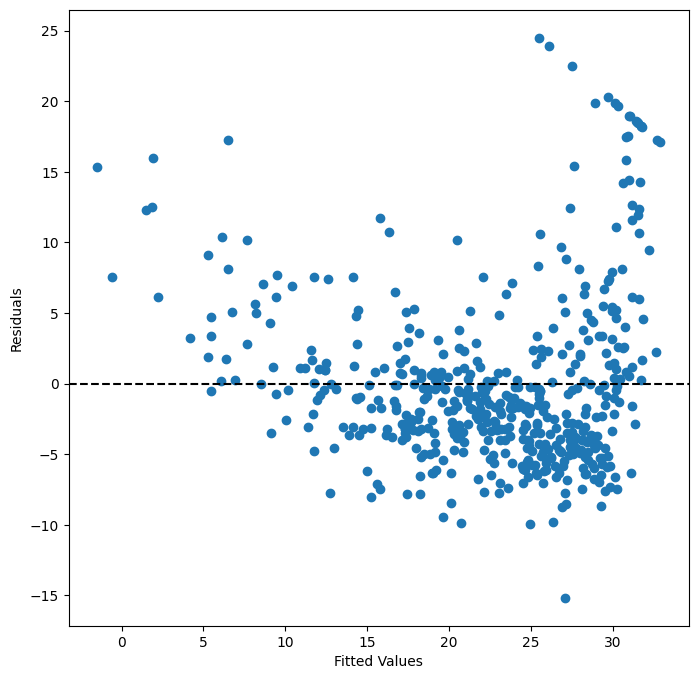

In [41]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues,results.resid)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.axhline(0, c ='k', ls='--');#horizontal line at 0

374

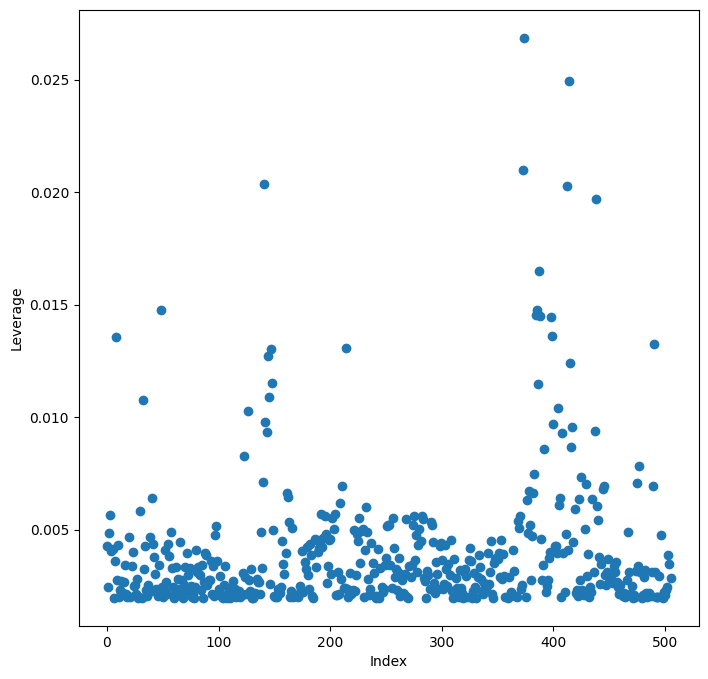

In [46]:
#we can also compute leverage statistics for our predictors with hat_matrix_diag and get_influence()
influence = results.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), influence.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(influence.hat_matrix_diag) #prints the X.index withe the highest leverage

# Multiple Linear Regression

In [51]:
X = MS(['lstat','age']).fit_transform(Boston)
model1 = sm.OLS(Y,X)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           2.98e-88
Time:                        14:49:10   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#if we want to use all our variables as predictors we can create , we can drop any variable we dont want in the model as a predictor, obviously we must drop the predicted var
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [63]:
# and use it directly on our previous code
X = MS(terms).fit_transform(Boston)
model = sm.OLS(Y,X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


# Goodness of Fit

In [69]:
# we can acces all the components of reasults with dir(results), most relevant stats are included in results.summary()
print('R2',results.rsquared)
print('#Adj R2',results.rsquared_adj)
print('RSE', np.sqrt(results.scale))
results.summary()

R2 0.7343070437613076
#Adj R2 0.7278398724126984
RSE 4.798034335596367


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.23e-133
Time:                        15:17:46   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     41.6173      4.936      8.431      0.000      31.919      51.316
crim          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
zn             0.0470      0.014      3.384      0.001       0.020       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.136
chas           2.8400      0.870      3.264      0.001       1.131       4.549
nox          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
rm             3.6581      0.420      8.705      0.000       2.832       4.484
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
rad            0.2894      0.067      4.325      0.000       0.158       0.421
tax           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
ptratio       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
lstat         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
#with list comprehension we can create a df for the VIF of x
vals = [VIF(X, i) for i in range(1,X.shape[1])] #calculate vif values with list comprehesion insted of using a separated for loop and .append()
vif = pd.DataFrame({'vif':vals}, index = X.columns[1:]) #create df for vif
vif


,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


# Interaction terms

In [70]:
#Including a tuple when calling ModelSpec() will inlcude an interaction term
X = MS(['lstat','age',('lstat','age')]).fit_transform(Boston)
model2 = sm.OLS(Y,X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


# Transformations

In [74]:
#We can include transformations in MS(), poly() for example ads a polynomial factor to the predictors
X = MS([poly('lstat',degree = 2),'age']).fit_transform(Boston)
model3 = sm.OLS(Y,X)
results3 = model3.fit()
summarize(model3.fit())

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [76]:
#we can compare models with and without transformations with anova_lm(), the Null hipothesis is that we dont need the transformation, if pvalue is high then we regect and transformation is good
anova_lm(results1,results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


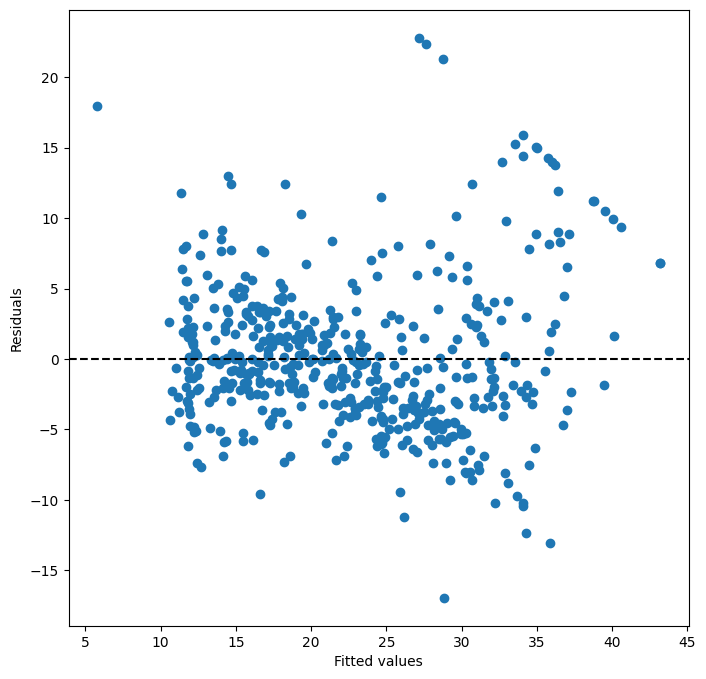

In [78]:
# if we replot the residuals as before we expect to see less of a trend
ax =plt.subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.axhline(0,c='k',ls='--')

# Qualitative predictors

In [80]:
# we load a new data set Carseats wihich includes some quali variables, to predict sales
Carseats = load_data('Carseats')
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [91]:
#ModelSpec() automatically generates dummys for qualitative variables and drops the first category in order to avoid colinearity with the intersect
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income','Advertising'),('Price','Age')] #adds two interaction terms

X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


Text(0, 0.5, 'Residuals')

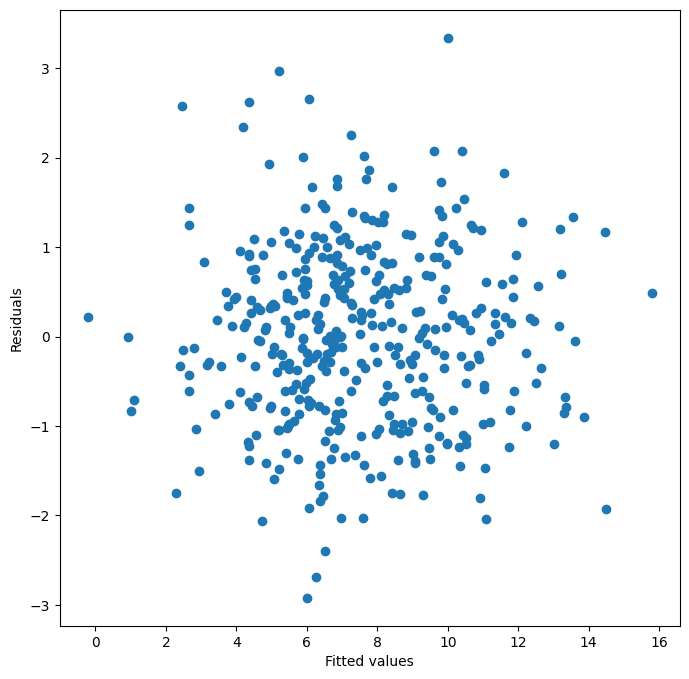

In [92]:
ax = plt.subplots(figsize = (8,8))[1]
ax.scatter(results.fittedvalues,results.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')